In [ ]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Input

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import Flatten

In [ ]:
from tensorflow.keras.layers import Conv2D

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
from tensorflow.keras.layers import LeakyReLU

In [ ]:
from tensorflow.keras.layers import Activation

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(208,208,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 2nd Convolutional Layer
#CNNs use 2D convolutional kernels to predict the segmentation map for a single slice.
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(300*300*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 96)        34944     
                                                                 
 activation (Activation)     (None, 50, 50, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 15, 15, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 256)        0         
 2D)                                                    

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset-20221013T025357Z-001/Dataset/train',target_size=(208,208),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset-20221013T025357Z-001/Dataset/test',target_size=(208,208),batch_size=32,class_mode='categorical')

Found 387 images belonging to 2 classes.
Found 104 images belonging to 2 classes.


In [ ]:
img_dims = 150
epochs = 6
batch_size = 32

In [ ]:
#### Fitting the model
history = model.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/3
12/12 [==============================] - 75s 6s/step - loss: 3.0477 - accuracy: 0.5296 - val_loss: 0.6800 - val_accuracy: 0.5833
Epoch 2/3
12/12 [==============================] - 4s 356ms/step - loss: 0.6393 - accuracy: 0.5443 - val_loss: 0.3911 - val_accuracy: 1.0000
Epoch 3/3
12/12 [==============================] - 4s 332ms/step - loss: 0.1615 - accuracy: 0.9521 - val_loss: 0.0026 - val_accuracy: 1.0000


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

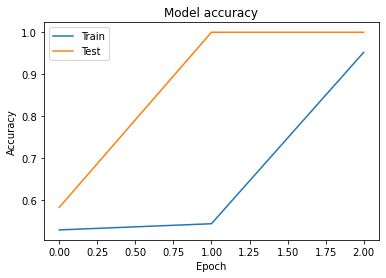

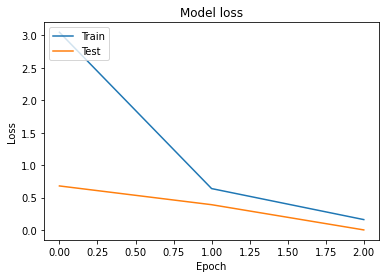

In [ ]:
graph()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_set)
print("Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
4/4 [==============================] - 0s 93ms/step - loss: 0.0024 - accuracy: 1.0000
Test Accuracy: {scores[1]*100}
